In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandasql import sqldf
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [7]:
# Loading building structure file
df= pd.read_csv('csv_building_structure.csv', index_col= 'building_id')
df.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Damaged-Repaired and used,Grade 1,Minor repair


In [8]:
# Loading ward_level_pred_intensity
df_ward= pd.read_csv('ward_level_pred_intensity.csv')
df_ward.head()

,ward_id,latitude,longitude,pred_intensity
0,120101,27.275716,86.275134,6.928824
1,120102,27.261992,86.235941,6.986425
2,120103,27.300831,86.275827,6.960487
3,120104,27.310806,86.345178,6.881559
4,120105,27.293568,86.327860,6.878566


In [9]:
# Loading municipal_level_pred_intensity
df_mun= pd.read_csv('mun_level_pred_intensity.csv')
df_mun.head()

,Unnamed: 0,Municipality,lat,lng,pred_intensity
0,0,Champadevi Rural Municipality,27.279530,86.267141,6.947919
1,1,Chishankhu Gadhi Rural Municipality,26.589858,87.214524,5.272554
2,2,Khiji Demba Rural Municipality,27.458782,86.360098,7.169129
3,3,Likhu Rural Municipality,27.866070,85.401439,7.814319
4,4,Manebhanjyang Rural Municipality,27.169869,86.430035,6.542592


<ipython-input-10-590367d440fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mun, x="Municipality", y="pred_intensity", palette="viridis")


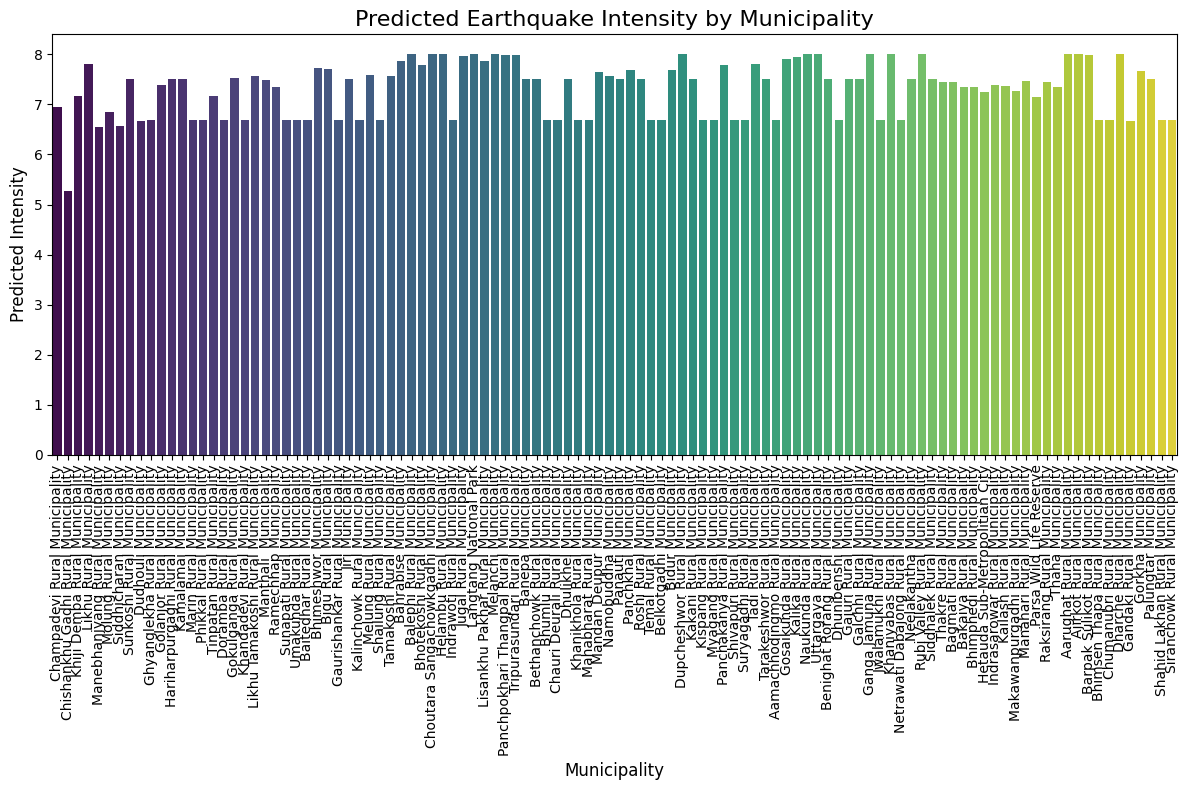

In [10]:
# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_mun, x="Municipality", y="pred_intensity", palette="viridis")

# Customizations
plt.xticks(rotation=90, ha="center")  # Rotate municipality names for readability
plt.xlabel("Municipality", fontsize=12)
plt.ylabel("Predicted Intensity", fontsize=12)
plt.title("Predicted Earthquake Intensity by Municipality", fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Merging two datasets df and df_wars. In df_ward we have intensities for every wards
pysqldf = lambda q: sqldf(q, globals())
df = pysqldf("""
    select *
    from df
    inner join df_ward
    on df.ward_id = df_ward.ward_id
""")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,ward_id,latitude,longitude,pred_intensity
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0.0,0.0,0.0,Damaged-Used in risk,Grade 3,Major repair,120703,27.28525,86.526839,6.508394
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0.0,0.0,0.0,Damaged-Repaired and used,Grade 5,Reconstruction,120703,27.28525,86.526839,6.508394
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0.0,0.0,0.0,Damaged-Repaired and used,Grade 2,Minor repair,120703,27.28525,86.526839,6.508394
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0.0,0.0,0.0,Damaged-Repaired and used,Grade 2,Minor repair,120703,27.28525,86.526839,6.508394
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0.0,0.0,0.0,Damaged-Repaired and used,Grade 1,Minor repair,120703,27.28525,86.526839,6.508394


In [12]:
df.set_index('building_id',inplace=True)

In [13]:
# Looking at null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623250 entries, 120101000011 to 311808001071
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   district_id                             623250 non-null  int64  
 1   vdcmun_id                               623250 non-null  int64  
 2   ward_id                                 623250 non-null  int64  
 3   count_floors_pre_eq                     623250 non-null  int64  
 4   count_floors_post_eq                    623250 non-null  int64  
 5   age_building                            623250 non-null  int64  
 6   plinth_area_sq_ft                       623250 non-null  int64  
 7   height_ft_pre_eq                        623250 non-null  int64  
 8   height_ft_post_eq                       623250 non-null  int64  
 9   land_surface_condition                  623249 non-null  object 
 10  foundation_type                 

In [14]:
# Since we have large data to work with and very few null values, we can drop them.
df.dropna(inplace=True)

# Since we are predicting the damage based on the building structure prior to the earthquake, we don't want to keep any post earthquake columns except our target i.e "Damage Grade"
df.drop(columns=["count_floors_post_eq","height_ft_post_eq","condition_post_eq","technical_solution_proposed"],inplace=True)

# We can drop columns that dont provide any info for classification like the id columns
df.drop(columns=["district_id","vdcmun_id","ward_id"],inplace=True)

<Axes: >

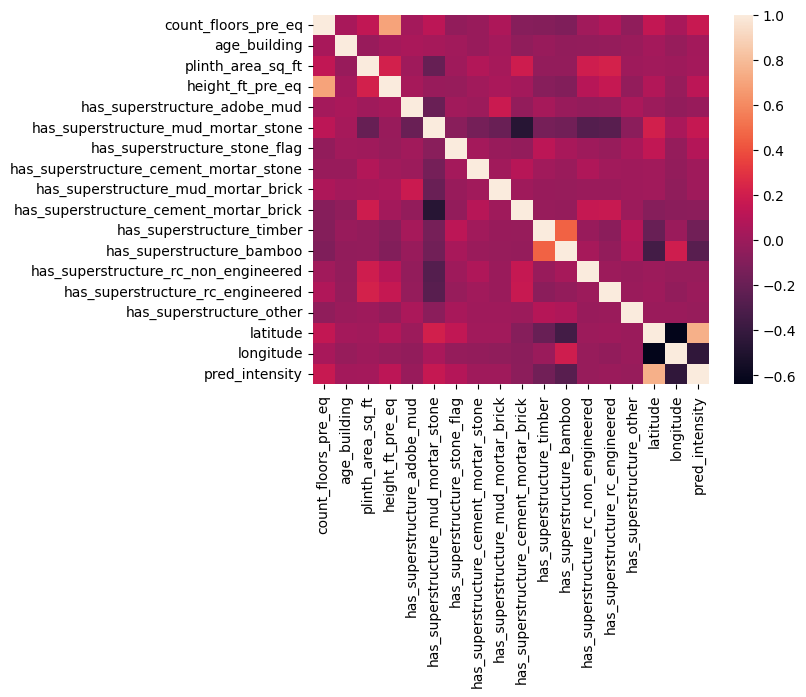

In [15]:
# Checking the coorelation between the numeric values with each other
# We drop damage_grade since it is our target.
correlation = df.drop(columns="damage_grade").select_dtypes("number").corr()
sns.heatmap(correlation)

In [16]:
# We can drop latitude, longitude since it has been used to calculate pred_intensity and thus provide no more information
df.drop(columns=["latitude","longitude"],inplace=True)

# We can also see high coorelation between height and count_floors. So we can drop one of them.
df.drop(columns="height_ft_pre_eq",inplace=True)

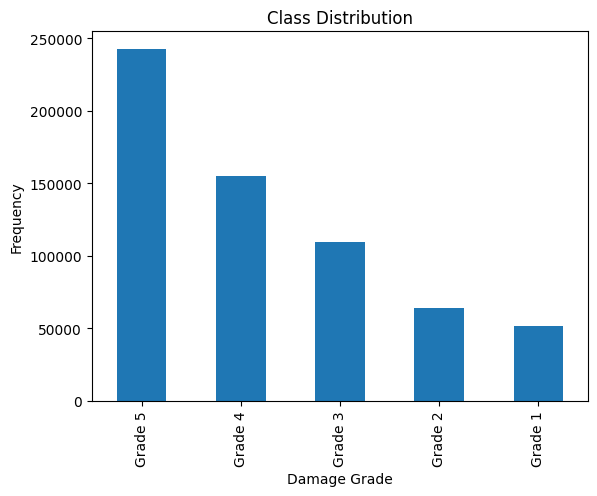

In [17]:
df["damage_grade"].value_counts().plot(kind="bar")
plt.xlabel("Damage Grade")
plt.ylabel("Frequency")
plt.title("Class Distribution");

In [18]:
baseline_accuracy = df["damage_grade"].value_counts(normalize=True).max()
baseline_accuracy

0.3894617938280301

In [19]:
# Converting target to ordinal values
damage = {
    "Grade 1" : 0,
    "Grade 2" : 1,
    "Grade 3" : 2,
    "Grade 4" : 3,
    "Grade 5" : 4
}
df["damage_grade"]=df["damage_grade"].replace(damage)

<ipython-input-19-aa2252bacd29>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["damage_grade"]=df["damage_grade"].replace(damage)


In [20]:
# X, y Split
target = "damage_grade"
X = df.drop(columns=target)
y = df[target]
print(f"X = {X.shape}, y = {y.shape}")

X = (623237, 22), y = (623237,)


In [21]:
# Train,Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(498589, 22) (498589,)
(124648, 22) (124648,)


In [22]:
# We will use XGBClassifier as our classification model
model = make_pipeline(OrdinalEncoder(),XGBClassifier(verbosity= 3,random_state =42,max_depth=7))

In [23]:
model.fit(X_train,y_train)

[06:56:11] ======== Monitor (0): HostSketchContainer ========
[06:56:11] AllReduce: 0.006183s, 1 calls @ 6183us

[06:56:11] MakeCuts: 0.006255s, 1 calls @ 6255us

[06:56:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[06:56:43] ======== Monitor (0): Learner ========
[06:56:43] Configure: 0.020966s, 1 calls @ 20966us

[06:56:43] EvalOneIter: 0.001359s, 100 calls @ 1359us

[06:56:43] GetGradient: 7.05572s, 100 calls @ 7055718us

[06:56:43] PredictRaw: 0.002559s, 100 calls @ 2559us

[06:56:43] UpdateOneIter: 31.7215s, 100 calls @ 31721500us

[06:56:43] ======== Monitor (0): GBTree ========
[06:56:43] BoostNewTrees: 24.6409s, 100 calls @ 24640910us

[06:56:43] CommitModel: 0.000202s, 100 calls @ 202us

[06:56:43] ======== Monitor (0): HistUpdater ========
[06:56:43] BuildHistogram: 6.45695s, 3000 calls @ 6456946us

[06:56:43] EvaluateSplits: 1.03716s, 3500 calls @ 1037155us

[06:56:43] InitData: 0.537591s, 500 calls @ 537591us

[06:56:43] InitRoot: 5.63011s, 500 calls @ 

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [28]:
# Make predictions on the test data
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5476


In [25]:
importances = model.named_steps["xgbclassifier"].feature_importances_
feature_names = X_train.columns

df_importances = pd.DataFrame({
    'Features':feature_names,
    'Importances' : importances
}).sort_values(by='Importances', ascending=False)
df_importances.head(10)

,Features,Importances
11,has_superstructure_mud_mortar_stone,0.403669
21,pred_intensity,0.089820
5,roof_type,0.057453
4,foundation_type,0.040947
10,has_superstructure_adobe_mud,0.038614
12,has_superstructure_stone_flag,0.037838
6,ground_floor_type,0.034452
7,other_floor_type,0.033524
19,has_superstructure_rc_engineered,0.027681
15,has_superstructure_cement_mortar_brick,0.024626


<Axes: xlabel='Importances', ylabel='Features'>

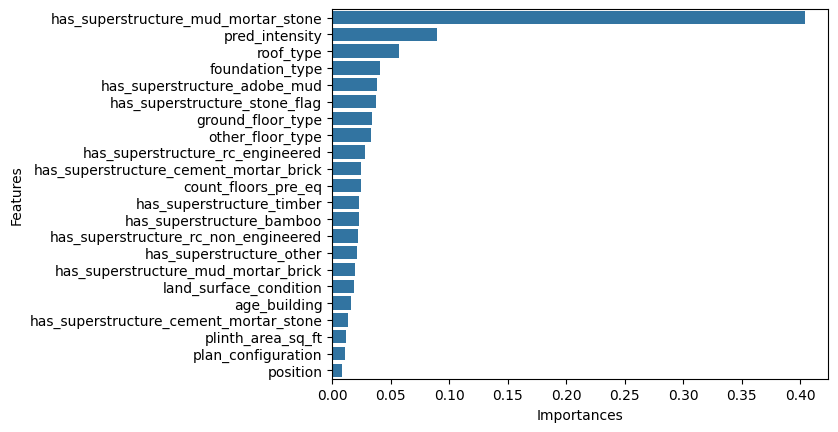

In [26]:
sns.barplot(x="Importances",y="Features",data=df_importances)

In [29]:
!apt-get install git



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
